<a href="https://colab.research.google.com/github/azamatarmanuly99/docs/blob/main/notebooks/13.01-Glycan-Trees-Selectors-and-Movers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!--NOTEBOOK_HEADER-->
*This notebook contains material from [PyRosetta](https://RosettaCommons.github.io/PyRosetta.notebooks);
content is available [on Github](https://github.com/RosettaCommons/PyRosetta.notebooks.git).*

<!--NAVIGATION-->
< [RosettaCarbohydrates](http://nbviewer.jupyter.org/github/RosettaCommons/PyRosetta.notebooks/blob/master/notebooks/13.00-RosettaCarbohydrates-Working-with-Glycans.ipynb) | [Contents](toc.ipynb) | [Index](index.ipynb) | [RosettaCarbohydrates: Modeling and Design](http://nbviewer.jupyter.org/github/RosettaCommons/PyRosetta.notebooks/blob/master/notebooks/13.02-Glycan-Modeling-and-Design.ipynb) ><p><a href="https://colab.research.google.com/github/RosettaCommons/PyRosetta.notebooks/blob/master/notebooks/13.01-Glycan-Trees-Selectors-and-Movers.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>

# RosettaCarbohydrates: Trees, Selectors and Movers
Keywords: carbohydrate, glycan, glucose, mannose, sugar, ResidueSelector, Mover

## Overview
Here, we will cover useful `ResidueSelectors` and `Movers` available in the RosettaCarbohdyrate framework.  All of these framework components form the basis for the tools you will use in the next tutorial, Glycan Modeling and Design.

**Make sure you are in the directory with the pdb files:**

`cd google_drive/MyDrive/student-notebooks/`

## Imports

Before we begin, we must import some specific machinery from Rosetta.  Much of these tools are automatically imported when we do `from pyrosetta import *`, however, some are not. You should get into the habit of importing everything you need.  This will get you comfortable with the organization of Rosetta and make it easier to find tools that are beyond the scope of these workshops.

In [1]:
!pip install pyrosettacolabsetup
import pyrosettacolabsetup; pyrosettacolabsetup.install_pyrosetta()
import pyrosetta; pyrosetta.init()


Mounted at /content/google_drive

Note that USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE.
See https://github.com/RosettaCommons/rosetta/blob/main/LICENSE.md or email license@uw.edu for details.

Looking for compatible PyRosetta wheel file at google-drive/PyRosetta/colab.bin//wheels...
Found compatible wheel: /content/google_drive/MyDrive/PyRosetta/colab.bin/wheels//content/google_drive/MyDrive/PyRosetta/colab.bin/wheels/pyrosetta-2024.1+release.00b79147e63-cp310-cp310-linux_x86_64.whl


PyRosetta-4 2023 [Rosetta PyRosetta4.MinSizeRel.python310.ubuntu 2024.01+release.00b79147e63be743438188f93a3f069ca75106d6 2023-12-25T16:35:48] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.MinSizeRel.python310.ubuntu r366 2024.01+release.00b79147e63 00b79147e63be743438188f93a3f06

In [2]:
#Python
from pyrosetta import *
from pyrosetta.rosetta import *
from pyrosetta.teaching import *


## Intitlialization

Here, we will be opening a PDB file with glycans, so we will use `-include_sugars` and a few other options that allow us to read (most) PDB files without issue. It is always a good idea to use the `GlycanInfoMover` to double check that the glycans you are interested in are properly represented by Rosetta.  If they are not, post the issue in the Rosetta forums.

Once again, more information on working with glycans can be found at this page: [Working With Glycans](https://www.rosettacommons.org/docs/latest/application_documentation/carbohydrates/WorkingWithGlycans)

### PDB vs Rosetta sugar format

Unfortunately, there are few standards in the PDB for how saccharide residues in `.pdb` files should be numbered and named. The Rosetta code — with the appropriate flags initialization flags, such as `-alternate_3_letter_codes pdb_sugar` tries its best to interpret `.pdb` files with sugars, but because of ambiguity and inconsistency, success is in no way ensured.  See http://www.rosettacommons.org/docs/latest/rosetta_basics/preparation/Preparing-PDB-files-for-non-peptide-polymers for more info


To guarantee that one can model the specific saccharide system desired unabiguously, Rosetta uses a slightly modified `.pdb` format for importing carbohydrate residues. The key difference in formats involves the `HETNAM` record of the PDB format. The standard PDB `HETNAM` record line:</p>

```HETNAM     GLC ALPHA-D-GLUCOSE```

...means that all `GLC` 3-letter codes in the <em>entire file</em> are α-<font style="font-variant: small-caps">d</font>-glucose, which is insufficient, as this
could mean several different α-<font style="font-variant: small-caps">d</font>-glucoses, depending on the ring form and on the main-chain connectivity of the glycan — and
many, many more if one includes modified sugars! The modified Rosetta-ready PDB `HETNAM`
record line:</p>

```HETNAM     Glc A   1  ->4)-alpha-D-Glcp```

...means that the `GLC` residue <em>specifically at position A1</em> requires the `->4)-alpha-D-Glcp` `ResidueType` or any of its `VariantType`s. (Note also that Rosetta uses sentence case 3-letter-codes for sugars.)</p>

Rosetta will output and input with this default format.
We use `-alternate_3_letter_codes pdb_sugar` to read in the PDB-format sugar and `-write_glycan_pdb_codes` to output the PDB format since we will be working with a structure directly from the PDB.





In [3]:
options = """
-ignore_unrecognized_res
-include_sugars
-auto_detect_glycan_connections
-maintain_links
-alternate_3_letter_codes pdb_sugar
-write_glycan_pdb_codes
-ignore_zero_occupancy false
-load_PDB_components false
-no_fconfig
"""

In [4]:
init(" ".join(options.split('\n')))

PyRosetta-4 2023 [Rosetta PyRosetta4.MinSizeRel.python310.ubuntu 2024.01+release.00b79147e63be743438188f93a3f069ca75106d6 2023-12-25T16:35:48] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: Rosetta version: PyRosetta4.MinSizeRel.python310.ubuntu r366 2024.01+release.00b79147e63 00b79147e63be743438188f93a3f069ca75106d6 http://www.pyrosetta.org 2023-12-25T16:35:48
core.init: command: PyRosetta -ignore_unrecognized_res -include_sugars -auto_detect_glycan_connections -maintain_links -alternate_3_letter_codes pdb_sugar -write_glycan_pdb_codes -ignore_zero_occupancy false -load_PDB_components false -no_fconfig -database /usr/local/lib/python3.10/dist-packages/pyrosetta/database
basic.random.init_random_generator: 'RNG device' seed mode, using '/dev/urandom', seed=-1375103665 seed_offset=0 real_seed=-1375103665
basic.random.init_random_generator: RandomGenerator:init: Normal mode, seed=

In [6]:
pose = pose_from_pdb("4do4_refined.pdb")
pose_original = pose.clone()

core.import_pose.import_pose: File '4do4_refined.pdb' automatically determined to be of type PDB
core.io.util: Found 18 glycan linkages in the structure based on atomic distances
core.io.util: Automatic glycan connection is activated.
core.io.util: Start reordering residues.
core.io.util: Corrected glycan residue order (internal numbering): [388, 389, 390, 391, 392, 393, 394, 395, 396, 797, 798, 799, 800, 801, 802, 803, 804, 805]
core.io.util:
core.io.pose_from_sfr.PoseFromSFRBuilder: Setting chain termination for 390
core.io.pose_from_sfr.PoseFromSFRBuilder: Setting chain termination for 394
core.io.pose_from_sfr.PoseFromSFRBuilder: Setting chain termination for 395
core.io.pose_from_sfr.PoseFromSFRBuilder: Setting chain termination for 396
core.io.pose_from_sfr.PoseFromSFRBuilder: Setting chain termination for 798
core.io.pose_from_sfr.PoseFromSFRBuilder: Setting chain termination for 799
core.io.pose_from_sfr.PoseFromSFRBuilder: Setting chain termination for 803
core.io.pose_from_sf

## Object Exploration: GlycanTreeSet, CarbohydrateInfo, and the GlycanInfoMover

Before we do anything else, lets get some information on the pose that we are working with.

### GlycanTreeSet

The `GlycanTreeSet` is created when glycans are added to a pose or a pose is created with glycans in it.  The `GlycanTreeSet` has information on each glycan tree and each residue's parent and child.  The tree set also has an observer attached to it, so it will auto-update itself when glycan residues are attached or removed from the pose.  The `GlycanTreeSet` is a part of the Pose's `Conformation` object.  First, lets expore this.

Lets find out how many glycan trees are and their lengths.

In [7]:
tree_set = pose.glycan_tree_set()

In [8]:
print(tree_set.n_trees())

6


Ok, so there are 6 glycan trees in our pose!  Cool.  Lets see what the largest one is:

In [9]:
print(tree_set.get_largest_glycan_tree_length())

5


#### GlycanTree and GlycanNode

The `GlycanTreeSet` is made up of `GlycanTree` objects.  Each of these is made up of `GlycanNodes` for each residue in a tree. Lets expore these.

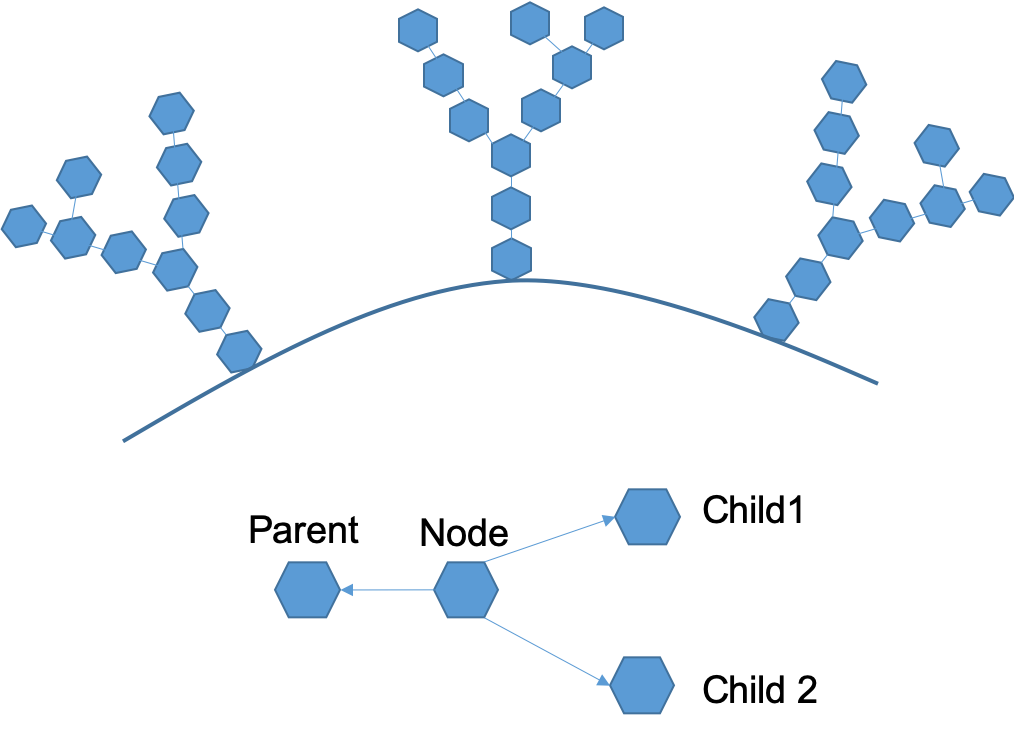

In [ ]:
from IPython.display import Image
Image('./Media/tree_set.png',width='500')

In [10]:
for start in tree_set.get_start_points():
    print(start, pose.pdb_info().pose2pdb(start), pose.residue_type(start).name3(), pose.residue_type(start).name())

388 501 A  Glc ->4)-beta-D-Glcp:2-AcNH
391 504 A  Glc ->4)-beta-D-Glcp:2-AcNH
396 509 A  Glc ->3)-beta-D-Glcp:non-reducing_end:2-AcNH
797 501 B  Glc ->4)-beta-D-Glcp:->6)-branch:2-AcNH
800 504 B  Glc ->4)-beta-D-Glcp:2-AcNH
805 509 B  Glc ->3)-beta-D-Glcp:non-reducing_end:2-AcNH


Lets look at the parent of each of these glycan start points to see if they are connected to a protein, and if so, what residue they are attached to.

In [11]:
for start in tree_set.get_start_points():
    parent = tree_set.get_parent(start)
    parent_naem = "NONE"
    if parent != 0:
        parent_name = pose.residue_type(parent).name3()
    print(parent, pose.pdb_info().pose2pdb(parent), parent_name)

107 124 A  ASN
160 177 A  ASN
368 385 A  ASN
503 124 B  ASN
556 177 B  ASN
764 385 B  ASN


Cool.  So they are all connected to protein residues at an Asparigine.  Lets take a look at the first sugar.

In [12]:
tree1 = tree_set.get_tree(388)

In [13]:
print("length", tree1.size())
print("root", tree1.get_root())

length 3
root 107


In [14]:
for res in tree1.get_residues():
    print(res, pose.residue_type(res).name3(), pose.residue_type(res).name())

388 Glc ->4)-beta-D-Glcp:2-AcNH
389 Glc ->4)-beta-D-Glcp:2-AcNH
390 Man ->3)-beta-D-Manp:non-reducing_end


Lets take a closer look at that Mannose, at the end of the tree.

In [15]:
node390 = tree1.get_node(390)

In [16]:
print("n_children", len(node390.get_children()))
print("parent", node390.get_parent())
print("distance", node390.get_distance_to_start())
print("exocylic_connection", node390.has_exocyclic_linkage())

n_children 0
parent 389
distance 2
exocylic_connection False


### CarbohydrateInfo

Lets get a bit more information on this particular glycan residue.

In [17]:
info390 = pose.residue_type(390).carbohydrate_info()

In [18]:
info390.anomeric_carbon()

1

In [19]:
info390.anomeric_carbon_name()

'C1'

In [20]:
info390.basic_name()

'mannose'

In [21]:
info390.cyclic_oxygen()

5

In [22]:
info390.cyclic_oxygen_name()

' O5 '

In [23]:
info390.full_name()

'beta-D-mannopyranosyl'

In [24]:
info390.has_mainchain_exocyclic_linkage_to_child()

False

In [25]:
info390.is_alpha_sugar()

False

In [26]:
info390.is_amino_sugar()

False

In [27]:
info390.is_beta_sugar()

True

In [28]:
info390.is_cyclic()

True

In [29]:
info390.is_acetylated()

False

As you can see, the `CarbohydrateInfo` object of `ResidueType` provides a great deal of information on this particular sugar.  By using the `GlycanTreeSet` and the `CarbohdrateInfo` objects, one can delineate nearly everything you wish to know about about a particular tree, glycan, and the connections of them in respect to each other and the whole pose.

## GlycanInfoMover

This mover essentially prints much of the connectivity information of a particular pose.  It is useful as a first-pass to get general info and to make sure that Rosetta is loading your glycan properly.

Note: You will need to look at the terminal for output of this mover.

In [30]:
from rosetta.protocols.analysis import *

<ipython-input-30-9f8467b0914c>:1: UserWarning: Import of 'rosetta' as a top-level module is deprecated and may be removed in 2018, import via 'pyrosetta.rosetta'.
  from rosetta.protocols.analysis import *


In [31]:
glycan_info = GlycanInfoMover()
glycan_info.apply(pose)

(Output copied below)

```
branch Point: ASN 107 124 A
Branch Point: ASN 160 177 A
Branch Point: ASN 368 385 A
Carbohydrate: 388 501 A  Parent: 107 BP: 0 501 A   CON: _->4       DIS: 0 ShortName: ->4)-beta-D-GlcpNAc-
Carbohydrate: 389 502 A  Parent: 388 BP: 0 502 A   CON: _->4       DIS: 1 ShortName: ->4)-beta-D-GlcpNAc-
Carbohydrate: 390 503 A  Parent: 389 BP: 0 503 A   CON:            DIS: 2 ShortName: beta-D-Manp-
Carbohydrate: 391 504 A  Parent: 160 BP: 0 504 A   CON: _->4       DIS: 0 ShortName: ->4)-beta-D-GlcpNAc-
Carbohydrate: 392 505 A  Parent: 391 BP: 0 505 A   CON: _->4       DIS: 1 ShortName: ->4)-beta-D-GlcpNAc-
Carbohydrate: 393 506 A  Parent: 392 BP: 1 506 A   CON: _->3,_->6  DIS: 2 ShortName: ->3)-beta-D-Manp-
Carbohydrate: 394 507 A  Parent: 393 BP: 0 507 A   CON:            DIS: 3 ShortName: alpha-D-Manp-
Carbohydrate: 395 508 A  Parent: 393 BP: 0 508 A   CON:            DIS: 3 ShortName: alpha-D-Manp-
Carbohydrate: 396 509 A  Parent: 368 BP: 0 509 A   CON:            DIS: 0 ShortName: beta-D-GlcpNAc-
Branch Point: ASN 503 124 B
Branch Point: ASN 556 177 B
Branch Point: ASN 764 385 B
Carbohydrate: 797 501 B  Parent: 503 BP: 1 501 B   CON: _->4,_->6  DIS: 0 ShortName: ->4)-beta-D-GlcpNAc-
Carbohydrate: 798 502 B  Parent: 797 BP: 0 502 B   CON:            DIS: 1 ShortName: beta-D-GlcpNAc-
Carbohydrate: 799 503 B  Parent: 797 BP: 0 503 B   CON:            DIS: 1 ShortName: alpha-L-Fucp-
Carbohydrate: 800 504 B  Parent: 556 BP: 0 504 B   CON: _->4       DIS: 0 ShortName: ->4)-beta-D-GlcpNAc-
Carbohydrate: 801 505 B  Parent: 800 BP: 0 505 B   CON: _->4       DIS: 1 ShortName: ->4)-beta-D-GlcpNAc-
Carbohydrate: 802 506 B  Parent: 801 BP: 1 506 B   CON: _->3,_->6  DIS: 2 ShortName: ->3)-beta-D-Manp-
Carbohydrate: 803 507 B  Parent: 802 BP: 0 507 B   CON:            DIS: 3 ShortName: alpha-D-Manp-
Carbohydrate: 804 508 B  Parent: 802 BP: 0 508 B   CON:            DIS: 3 ShortName: alpha-D-Manp-
Carbohydrate: 805 509 B  Parent: 764 BP: 0 509 B   CON:            DIS: 0 ShortName: beta-D-GlcpNAc-
Glycan Residues: 18
Protein BPs: 6
TREES
107 124 A  Length: 3
160 177 A  Length: 5
368 385 A  Length: 1
503 124 B  Length: 3
556 177 B  Length: 5
764 385 B  Length: 1
```

### Branched Connections

Now we can see all of our glycans in the pose, all of their parents, and how all of them are connected to one another. Note residue 803 - here we have two connections.  both at carbons 3 and 6.  This means we have a branched connection and that residue 802 has two children.  A branched connection is always at carbon 6, which is an exocyclic connection.  This point has 3 backbone dihedrals instead of our standard two.  Lets confirm all of that.

In [32]:
#This is code used to get the branch points in CarbohydrateInfoMover, converted from C++:
def get_connections(localpose, resnum):
    info = localpose.residue(resnum).carbohydrate_info()
    outstring = ""
    attach = "_->"

    if info.mainchain_glycosidic_bond_acceptor():
        outstring = attach + str(info.mainchain_glycosidic_bond_acceptor())


    for i in range(1, info.n_branches()+1):
        outstring = outstring + "," +attach + str(info.branch_point( i ))

    return outstring;

get_connections(pose, 802)

'_->3,_->6'

In [33]:
tree802 = tree_set.get_tree_containing_residue(802)
node802 = tree_set.get_node(802)

In [34]:
print("len", tree802.size())
print("children", node802.get_children())
print("exocyclic", node802.has_exocyclic_linkage())

len 5
children vector1_unsigned_long[803, 804]
exocyclic False


Note that 802 doesn't have an exocyclic back to it's parent - however, one of its children has the exocyclic connection back to it.  Lets find out which one.

In [35]:
print("exo_803", tree802.get_node(803).has_exocyclic_linkage())
print("exo_804", tree802.get_node(804).has_exocyclic_linkage())

exo_803 False
exo_804 True


Cool.  So residue 804 is branched connection. Lets take a closer look.

In [36]:
node804 = tree802.get_node(804)
node803 = tree802.get_node(803)

In [37]:
node802.get_mainchain_child()

803

### MoveMapFactory vs MoveMap creation

Here is something important to note.  Rosetta has a concept of the 'mainchain' as it was primarily written for proteins - that are linear in nature.  At the deep part of Rosetta, even sugars are denoted as having a 'mainchain'.  This mainchain is the 'non-branched' connections.  In this case, the mainchain continues onto residue 803, while the 'branch' goes off to residue 804.  This is __EXTREMELY__ important to be aware of as MoveMaps have seperate switches for 'branched' torsions.  In this way, you should always use the `MoveMapFactory` which does all this automatically for creating glycan Movemaps or torsions that are branched will not be turned on!!!

After that side-note, lets confirm that there are indeed 3 torsions for the branched connection of residue 802 and 804. Remember that torsions are defined from child TO parent!

In [38]:
from rosetta.core.pose.carbohydrates import *
from rosetta.core.conformation.carbohydrates import *

In [39]:
get_n_glycosidic_torsions_in_res(pose.conformation(), 804)

3

Great.  We have 3. Lets make sure our mainchild child has two.

In [40]:
get_n_glycosidic_torsions_in_res(pose.conformation(), 803)

2

Awesome.  Finally, lets see how many torsions between our first glycan residue of this tree and the ASN.  Note that ASN has 3 'chi' angles before glycosylation.

In [41]:
get_n_glycosidic_torsions_in_res(pose.conformation(), tree1.get_start())

4

After glycosylation, this ASN chi no longer has side-chains to pack.  In the packer, they are turned off, as they are now part of the glycan backbone.  How does Rosetta know that this should be turned off?  Lets see.

In [42]:
protein_res = tree802.get_node(tree802.get_start()).get_parent()
print(protein_res, pose.residue_type(protein_res).name3())

556 ASN


In [43]:
print("Is Branch Point:", pose.residue(protein_res).is_branch_point())

Is Branch Point: True


Ok, Now we can see that this residue is a branch point - meaning that it once again has a mainchain connection that goes onto the the next protein residue, and a branch out to the start of the glycan.  Take a look at the rest of the glycan residues.  Which are the branch points?  Does this info match what the `GlycanInfoMover` printed?

## Glycan Residue Selectors

Now that we have a good idea about the glycans in our pose, lets use some residue selectors that use the underlying tools that we just learned about.

### GlycanResidueSelector

The most basic, but useful selector is the `GlycanResidueSelector`.  Here is the description:
```
A ResidueSelector for carbohydrates and individual carbohydrate trees.
  Selects all Glycan residues if no option is given or the branch going out from the root residue.
  Selecting from root residues allows you to choose the whole glycan branch or only tips, etc.
```

#### All Carbohydrates

First, lets select all carbohydrate residues in the pose.

In [44]:
from rosetta.core.select.residue_selector import *
glycan_selector = GlycanResidueSelector()
all_glycans = glycan_selector.apply(pose)

def print_selection(localpose, selection):
    for i in range(1, localpose.size()+1):
        if selection[i]:
            print(i, localpose.residue_type(i).name3())

print_selection(pose, all_glycans)

388 Glc
389 Glc
390 Man
391 Glc
392 Glc
393 Man
394 Man
395 Man
396 Glc
797 Glc
798 Glc
799 Fuc
800 Glc
801 Glc
802 Man
803 Man
804 Man
805 Glc


#### Branch Selection

Now lets select a particular glycan tree.  We can give either the start of the tree or the connecting protein residue.  By default, we do not include the root residue that we pass to the selector.  This selection is useful for modeling only a particular glycan tree (or parts of a tree) at a time.  It will select all the children and all the children of children/etc. from your selection, out to the tips.

In [45]:
glycan_selector.set_select_from_branch_residue(800)
glycan_selector.set_include_root(True)

print_selection(pose, glycan_selector.apply(pose))

800 Glc
801 Glc
802 Man
803 Man
804 Man


Cool.  Now selection from the ASN, but not include the root.

In [46]:
glycan_selector.set_select_from_branch_residue(556)
glycan_selector.set_include_root(False)
print_selection(pose, glycan_selector.apply(pose))

800 Glc
801 Glc
802 Man
803 Man
804 Man


We get the same results.  Awesome.  This selector can be used in modeling and design tasks in the next tutorial.   We can also pass multiple branch residues to select many parts or use the `AndSelector` as you have seen previously to combine selections.  Pass that selector to the `MoveMapFactory` when doing any minimization or relax.

### GlycanLayerSelector

A selector for choosing glycan residues based on their layer - as measured by the residue distance to the start of the glycan tree.

If no layer is set, will select all glycan residues.

This layer selector is used for modeling glycans from their roots out to their trees as you will see in the next tutorial.  This definition of 'layer' is useful due to branching and can be used to optimize specific layers at a time.

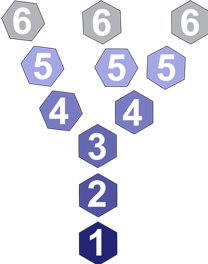

In [ ]:
Image('./Media/tree_layers.png',width='200')

In [47]:
layer_selector = GlycanLayerSelector()

In [48]:
#Lets select just the first two layers of all the glycans.

layer_selector.set_layer(0, 1)
print_selection(pose, layer_selector.apply(pose))

388 Glc
389 Glc
391 Glc
392 Glc
396 Glc
797 Glc
798 Glc
799 Fuc
800 Glc
801 Glc
805 Glc


In [49]:
#Now lets select only those glycans that have larger layers
layer_selector.set_layer_as_greater_than_or_equal_to(2)
print_selection(pose, layer_selector.apply(pose))

390 Man
393 Man
394 Man
395 Man
802 Man
803 Man
804 Man


Note the residues 802, and children 803 and 804.  Both 803 and 804 will have the same layer.

### GlycanSequonSelector

So we have some tools for selecting specific glycan residues we are interested in.  Now lets change tune a bit.  A Sequon is the 3 residue motif recognized by GlycosylTransferase that adds the first glycan onto a protein. There are a few sequon's that are recognized by the glycosylation machinery`[N:(not-p):(S or T)]`, and you can set all or specific ones to use in this selector (via RosettaScripts unfortunately).

We'll cover this more in-depth in the next tutorial, but this selector can be useful for finding potential glycosylation sites in a pose.

Note that the `ResidueInSequenceMotifSelector` is a general-purpose version of this selector.

In [50]:
sequon_selector = GlycanSequonsSelector()
print_selection(pose, sequon_selector.apply(pose))

core.select.residue_selector.ResidueInSequenceMotifSelector: Use ResidueInSequenceMotifSelector with regular expression
core.select.residue_selector.ResidueInSequenceMotifSelector: searching in: LDNGLLQTPPMGWLAWERFRCNINCDEDPKNCISEQLFMEMADRMAQDGWRDMGYTYLNIDDCWIGGRDASGRLMPDPKRFPHGIPFLADYVHSLGLKLGIYADMGNFTCMGYPGTTLDKVVQDAQTFAEWKVDMLKLDGCFSTPEERAQGYPKMAAALNATGRPIAFSCSWPAYEGGLPPRVQYSLLADICNLWRNYDDIQDSWWSVLSILNWFVEHQDILQPVAGPGHWNDPDMLLIGNFGLSLEQSRAQMALWTVLAAPLLMSTDLRTISAQNMDILQNPLMIKINQDPLGIQGRRIHKEKSLIEVYMRPLSNKASALVFFSCRTDMPYRYHSSLGQLNFTGSVIYEAQDVYSGDIISGLRDETNFTVIINPSGVVMWYLYPIKZZZZZZZZZLDNGLLQTPPMGWLAWERFRCNINCDEDPKNCISEQLFMEMADRMAQDGWRDMGYTYLNIDDCWIGGRDASGRLMPDPKRFPHGIPFLADYVHSLGLKLGIYADMGNFTCMGYPGTTLDKVVQDAQTFAEWKVDMLKLDGCFSTPEERAQGYPKMAAALNATGRPIAFSCSWPAYEGGLPPRVQYSLLADICNLWRNYDDIQDSWWSVLSILNWFVEHQDILQPVAGPGHWNDPDMLLIGNFGLSLEQSRAQMALWTVLAAPLLMSTDLRTISAQNMDILQNPLMIKINQDPLGIQGRRIHKEKSLIEVYMRPLSNKASALVFFSCRTDMPYRYHSSLGQLNFTGSVIYEAQDVYSGDIISGLRDETNFTVIINPSGVVMWYLYPIKNLEMSQQHHHHHHZZZZZZZZZ

Note that while 8 motifs were found in th pose, not all are glycosylated - in fact 6/8 are glycosylated from our information from the `GlycanInfoMover`

### RandomGlycanFoliageSelector

This is a simple selector that Selects a random carbohydrate residue from a subset or selector, then selects the rest of the glycan foliage.  Used for sampling.

In [51]:
random_foliage = RandomGlycanFoliageSelector()

In [52]:
random_foliage.set_selector(glycan_selector)
print_selection(pose, random_foliage.apply(pose))

803 Man


In [53]:
print_selection(pose, random_foliage.apply(pose))

802 Man
803 Man
804 Man


In [54]:
print_selection(pose, random_foliage.apply(pose))

801 Glc
802 Man
803 Man
804 Man


In [55]:
print_selection(pose, random_foliage.apply(pose))

804 Man


## Glycan Movers

Lets do a quick look at some useful glycan-specific movers

### LinkageConformerMover

The `LinkageConformerMover` is an integral part of glycan modeling.  This mover puts a 'conformer' of glycan dihedrals into a pose that was identified through a large-scale bioinformatic analysis.  A conformer is a well-defined and well-represented set of dihedral angles for a specific linkage.  The linkage is specific for different types of sugars in the i and i+1 spot, as well as the specific the i+1 glcyan is connected to on residue i.  The mover is useful, but should not be used by itself.  You will want a MonteCarlo object, and most likely some packing and minimization to go with it.

In [56]:
from rosetta.protocols.carbohydrates import *
score = get_score_function()
mc = MonteCarlo(pose, score, 4.0)


core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
core.scoring.etable: Starting energy table calculation
core.scoring.etable: smooth_etable: changing atr/rep split to bottom of energy well
core.scoring.etable: smooth_etable: spline smoothing lj etables (maxdis = 6)
core.scoring.etable: smooth_etable: spline smoothing solvation etables (max_dis = 6)
core.scoring.etable: Finished calculating energy tables.
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/HBPoly1D.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/HBFadeIntervals.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/HBEval.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/DonStrength.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/AccStrength.csv
basic.io.database: Database file opened: scoring/score_functions/rama/fd/

In [57]:
conformer_mover = LinkageConformerMover()

In [58]:
conformer_mover.set_residue_selector(layer_selector)
conformer_mover.set_use_gaussian_sampling(True)
conformer_mover.set_use_conformer_population_stats(False)

pose = pose_original.clone()

for i in range(1, 750):
    conformer_mover.apply(pose)
    print(score.score(pose), mc.boltzmann(pose))

mc.recover_low(pose)
print(score.score(pose_original), score.score(pose))

protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->3)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-2438.6412638260567 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->6)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 0.5599
protocols.carbohydrates.LinkageConformerMover: Complete
-2473.898240338273 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->3)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 1 which has a population of 1
protocols.carbohydrates.LinkageConformerMover: Complete
-1351.2254341599107 False
protocols.carbohydrates.LinkageConformerMover: Sampling alpha-D-Manp-(?->6)-beta-D-Manp- linkage
protocols.carbohydrates.LinkageConformerMover: Sampling conformer 2 which 

Did we find a better conformer? Did our energy decrease even in a pre-refined pose?  It should be noted that we use guassian sampling to sample around the gaussian using the standard deviation and mean of each dihedral in the conformer.  Otherwise, we just use the mean.  This gives some variance in our conformers.

Use the RMSDMetric and the `LayerSelector` and `GlycanLayerSelector` to calculate the RMSD of change of the pose relative to the original_pose.  Take a look in PyMol.  How much has it changed?

### Correcting Structures

#### TautomerizeAnomerMover

This mover is useful when solving structures of glycans or fixing errors in PDB files.  Here is the description:

A Mover class for tautomerizing from one anomer to another at a reducing end.

@details  

This carbohydrate-specific Mover randomly selects a free reducing end (not a glycoside) and inverts the
stereochemistry, swapping alpha anomers for beta and beta for alpha.  (This could be considered an extremely
limited design case; however, reducing ends readily tautomerize in solution, in contrast to other cases, in which
residues do not readily mutate into others!)  

It is generally not certain which form is preferred (if any) in
sugar-binding proteins, and crystal structures sometimes arbitrarily assign one anomer over another when fitting
density, so this Mover can assure that each anomer is sampled.
If a ResidueSelector is set, the Mover will select from the subset at random; it will not guarantee
tautomerization of every Residue in the subset.

In this case, all of our residues are lower termini, as they are all connected to proteins - so this mover doesn't do anything for us - but if you had free glycans, you could use this here.


In [59]:
glycan_selector = GlycanResidueSelector()

tautomerize_mover = TautomerizeAnomerMover()
tautomerize_mover.selector(glycan_selector)


pose = pose_original.clone()

tautomerize_mover.apply(pose)

protocols.carbohydrates.TautomerizeAnomerMover: Mover name: TautomerizeAnomerMover, Mover type: TautomerizeAnomerMover, Mover current tag:NoTag
protocols.carbohydrates.TautomerizeAnomerMover: Getting movable residues....
protocols.carbohydrates.TautomerizeAnomerMover: [ WARNING ] There are no movable residues available in the given pose.


#### IdealizeAnomericHydrogens

This mover was references in Frenz, et al - Automatically fixing errors in carbohydrate structures.  Referenced in the previous tutorial.  It is used to idealize anomeric hydrogens, which sometimes can be quite wrong in structures or not well optimized. Since our input structure was actually refined through cartesian relax into the crystal density, the hydrogens should already be idealized.

In [60]:
pose = pose_original.clone()
idealize_anomeric_hs = IdealizeAnomericHydrogens()
idealize_anomeric_hs.apply(pose)

print(score.score(pose_original), score.score(pose))

-2605.3899164749364 -2605.1142427395193


#### RingPlaneFlipMover

https://www.rosettacommons.org/docs/latest/scripting_documentation/RosettaScripts/Movers/movers_pages/carbohydrates/RingPlaneFlipMover

Based on a given ResidueSelector and limited by a MoveMap, this Mover selects applicable cyclic residues and performs a 180-degree shearing move in which the anomeric bond and the main-chain bond on the opposite side of the ring are moved in opposite directions. An "applicable" residue is limited to 1,4-linked aldopyranoses or 2,5-linked ketopyranoses for which both the anomeric bond and the glycosidic linkage bond are equatorial.

This Mover is useful in cases — for example, when working with highly charged and sulfated heparins — where Rosetta models an oligo- or polysaccharide in such a way that the residue is sitting in the relatively correct position but is missing favorable interactions that it could make on the other side of the glycan ring. Sometimes, a simple "ring flip" could correct this, but the energy barrier to rotate is too high; the small moves of a ShearMover would never flip the ring around.

In [61]:
ring_flipper = RingPlaneFlipMover()

pose = pose_original.clone()
mc = MonteCarlo(pose, score, 4.0)

for i in range(1, 200):
    ring_flipper.apply(pose)
    print(score.score(pose), mc.boltzmann(pose))

mc.recover_low(pose)
print(score.score(pose_original), score.score(pose))

protocols.carbohydrates.RingPlaneFlipMover: Mover name: RingPlaneFlipMover, Mover type: RingPlaneFlipMover, Mover current tag:NoTag
protocols.carbohydrates.RingPlaneFlipMover: Getting movable torsions....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 388 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 389 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Manp:non-reducing_end 390 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 391 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->4)-beta-D-Glcp:2-AcNH 392 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 394 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-alpha-D-Manp:non-reducing_end 395 can flip....
protocols.carbohydrates.RingPlaneFlipMover: Checking if ->3)-beta-D-Glcp:non-reducin

### Glycosylation

Glycosylation can be performed by either a function as you have seen in the previous tutorial, or through a mover, the `SimpleGlycosylateMover`.  This mover is covered in the next tutorial

### BB Sampling

Here, we will cover a few more components of glycan sampling, without the modeling movers covered in the next section

#### GlycanTreeMinMover
The `GlycanTreeMinMover` is useful as it randomly selects a glycan tree and a residue in the glycan tree set to move through a movemap, and then minimizes the rest of glycan foliage. Underneath the hood, it uses the `RandomGlycanFoliageSelector`.  

In [62]:
foliage_min = GlycanTreeMinMover(glycan_selector)
foliage_min.apply(pose)

protocols.carbohydrates.GlycanTreeMinMover: Minimizing from carbohydrate root: 393
core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
core.scoring.ScoreFunctionFactory: The -include_sugars flag was used with no sugar_bb weight set in the weights file.  Setting sugar_bb weight to 0.5 by default.
core.scoring.ScoreFunctionFactory:  The -include_sugars flag was used without fa_intra_rep_xover4 term in the scorefunction. Setting this term's weight to 0.55. It is generally recommended to use the -beta scorefunction (Rosetta-ICO) with sugars, which includes this and other desired terms such as those bridging waters
protocols.carbohydrates.GlycanTreeMinMover: Minimizing 3 residues


In [63]:
foliage_min.apply(pose)

protocols.carbohydrates.GlycanTreeMinMover: Minimizing from carbohydrate root: 388
protocols.carbohydrates.GlycanTreeMinMover: Minimizing 3 residues


In [64]:
foliage_min.apply(pose)

protocols.carbohydrates.GlycanTreeMinMover: Minimizing from carbohydrate root: 802
protocols.carbohydrates.GlycanTreeMinMover: Minimizing 3 residues


#### BBSampler: SugarBBSampler

Since glycans can have 2-4+ dihedral angles, a new way to sample specific backbone residues was created.  This is the BBSampler framework. It is also integrated into the GlycanModeler covered in the next chapter.

The `SugarBBSampler` works by using the `sugar_bb` energy term as probabilities for each dihedral of each linkage type and using them for sampling.

Note that we could sample on omega as well, and we can give the sampler a mask using the function `set_dihedral_mask()` that tells it which residues have which dihedrals to sample.  For now, we'll just sample phi and psi.

In [65]:
from rosetta.protocols.simple_moves import *
from rosetta.protocols.simple_moves.bb_sampler import *
from rosetta.core.id import *

In [66]:
sampler = BBDihedralSamplerMover()
sugar_bb_phi = SugarBBSampler(phi_dihedral)
sugar_bb_psi = SugarBBSampler(psi_dihedral)

In [67]:
#We include from residue 801, as there is no sugarbb data for the ASN-glycan linkage.
glycan_selector.set_select_from_branch_residue(801)
glycan_selector.set_include_root(True)

sampler.add_sampler(sugar_bb_phi)
sampler.add_sampler(sugar_bb_psi)
sampler.set_residue_selector(glycan_selector)
for i in range(1, 300):
    sampler.apply(pose)
    print(score.score(pose), mc.boltzmann(pose))

mc.recover_low(pose)
print(score.score(pose_original), score.score(pose))

-2604.758791698419 True
-2604.7625082257605 True
-2603.0482970882304 True
-2603.730171245708 True
-2284.1191761979494 False
-2580.2255206284035 False
-2601.2319637112146 True
-2601.190374612452 True
-2579.8453633521326 False
-2600.3930162243837 False
-2602.40814577649 True
-2601.588263719508 True
-2582.041808760951 False
-2602.0300903061075 True
-2599.1867665286572 True
-2555.8975074709733 False
-2600.3227094992667 True
-2551.922888834945 False
-2581.6960899437972 False
-2600.2127959312597 True
-2593.743749960518 False
-2600.2473948756856 True
-2600.2260518024495 True
-2588.792885616909 False
-2587.2785121296247 False
-2601.0262488763933 True
-2600.331602274766 True
-2601.004624293776 True
-2601.338525333959 True
-2592.508005503196 True
-2577.992343443111 False
-2595.120522938292 True
-2595.290246488762 True
-2271.4770566077514 False
-2595.195516759756 True
-2595.4032482443286 True
-2604.2504663246186 True
-2604.051079264511 True
-2590.1079426885362 False
-2603.3068649100433 True
-2586

Were we able to improve the energy just from using sugarBB on this glycan tree?

## Conclusion

This has covered most of the current RosettaCarbohydrate components you may find useful.  The next tutorial will build on these components and use new movers that encorporate them for modeling and design.

<!--NAVIGATION-->
< [RosettaCarbohydrates](http://nbviewer.jupyter.org/github/RosettaCommons/PyRosetta.notebooks/blob/master/notebooks/13.00-RosettaCarbohydrates-Working-with-Glycans.ipynb) | [Contents](toc.ipynb) | [Index](index.ipynb) | [RosettaCarbohydrates: Modeling and Design](http://nbviewer.jupyter.org/github/RosettaCommons/PyRosetta.notebooks/blob/master/notebooks/13.02-Glycan-Modeling-and-Design.ipynb) ><p><a href="https://colab.research.google.com/github/RosettaCommons/PyRosetta.notebooks/blob/master/notebooks/13.01-Glycan-Trees-Selectors-and-Movers.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>